In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Embedding
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelEncoder

max_features = 10000
maxlen = 500

# Carregar os dados do arquivo CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Obter os textos das colunas relevantes
x_train_text = train_data['LyricsClean']
y_train = train_data['sentiment']
x_test_text = test_data['LyricsClean']
y_test = test_data['sentiment']

# Tokenização dos textos
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train_text)

x_train = tokenizer.texts_to_sequences(x_train_text)
x_test = tokenizer.texts_to_sequences(x_test_text)

# Padding das sequências
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplique a codificação aos rótulos de destino
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

print(x_train.shape)
print(y_train_encoded.shape)

print(x_test.shape)
print(y_test_encoded.shape)

print(x_train[0])
print(y_train_encoded[0])

(726, 500)
(726,)
(182, 500)
(182,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 

# epoch=30, batch_size=32

In [2]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))  # Número de classes alterado para 3

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])  # Métrica alterada

model.summary()

history = model.fit(x_train, y_train_encoded, epochs=9, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 3)                 12003     
                                                                 
Total params: 92,003
Trainable params: 92,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
19/19 [==============================] - 0s 8ms/step - loss: 0.8950 - sparse_categorical_accuracy: 0.6017 - val_loss: 0.8261 - val_sparse_categorical_accuracy: 0.6507
Epoch 2/9
19/19 [==============================] - 0s 3ms/step - loss: 0.8497 - sparse_categorical_accuracy: 0.6293 - val_loss: 0.8196 - va

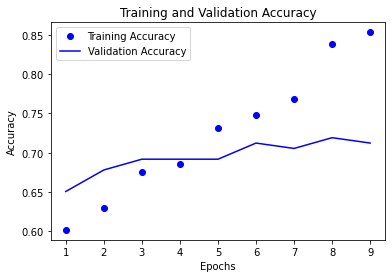

In [3]:
acc_values = history.history['sparse_categorical_accuracy']
val_acc_values = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


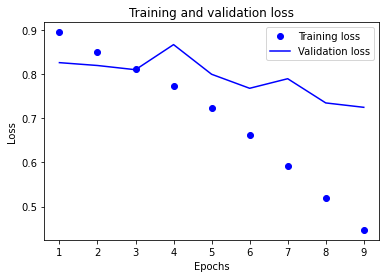

In [4]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

6/6 [==============================] - 0s 1ms/step
[[0.07492904 0.02991147 0.89515954]
 [0.16705228 0.04756964 0.78537804]
 [0.24307686 0.06533685 0.69158626]
 [0.11450041 0.07247356 0.813026  ]
 [0.23394768 0.05434228 0.71171016]]


array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [6]:
results = model.evaluate(x_test, y_test_encoded, verbose = 0)
print(results)

[0.7543604969978333, 0.6813187003135681]


# Mudar

In [7]:
from tensorflow.keras import models, layers

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])  # Métrica alterada

model.summary()

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 8)            80000     
                                                                 
 flatten_9 (Flatten)         (None, 4000)              0         
                                                                 
 dense_12 (Dense)            (None, 3)                 12003     
                                                                 
Total params: 92,003
Trainable params: 92,003
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

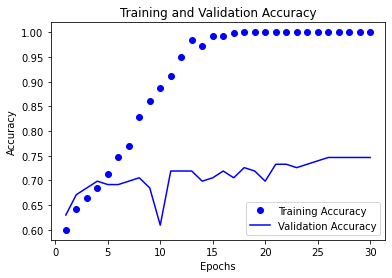

In [8]:
acc_values = history.history['sparse_categorical_accuracy']
val_acc_values = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


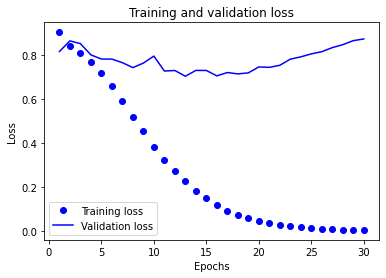

In [9]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

6/6 [==============================] - 0s 1ms/step
[[7.2773510e-06 3.8996750e-06 9.9998873e-01]
 [3.0868314e-04 1.1728359e-03 9.9851853e-01]
 [2.1717854e-02 7.1456018e-03 9.7113663e-01]
 [2.5821186e-03 1.1110051e-02 9.8630780e-01]
 [2.1623202e-02 1.5040035e-03 9.7687280e-01]]


array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [11]:
results = model.evaluate(x_test, y_test_encoded, verbose = 0)
print(results)

[1.0131185054779053, 0.7197802066802979]


# AA

In [8]:
hidden = 4

model2 = Sequential()
model2.add(layers.Dense(hidden, activation='softmax', input_shape=(10000,)))
model2.add(layers.Dense(hidden, activation='softmax'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[SparseCategoricalAccuracy()])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, y_test, verbose = 0)
print(results2)

history_dict2 = history2.history
loss_values2 = history_dict2['loss'] 
val_loss_values2 = history_dict2['val_loss']

plt.plot(epochs, loss_values2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'layers' is not defined